In [20]:
%matplotlib inline
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Temperature Data
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [21]:
# Read the url and store into a pandas dataframe
temp_df = pd.read_html(url)[0]
temp_df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [22]:
# Confirm the data types
temp_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [23]:
# Check to see no null values - none so ok
#temp_df.isnull().sum()

In [24]:
#### Data to pandad df & changed data type for terrestrial date from object to datetime type
temp_df['terrestrial_date']= pd.to_datetime(temp_df['terrestrial_date'])
temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [25]:
temp_df['terrestrial_date']

0      2012-08-16
1      2012-08-17
2      2012-08-18
3      2012-08-19
4      2012-08-20
          ...    
1862   2018-02-23
1863   2018-02-24
1864   2018-02-25
1865   2018-02-26
1866   2018-02-27
Name: terrestrial_date, Length: 1867, dtype: datetime64[ns]

In [26]:
# 6. No. of months in Mars 
# 6. Answer = 12 months
len(temp_df['month'].unique())

12

In [27]:
ique())# 7.How many Martian (and not Earth) days worth of data exist in the scraped dataset? 
# 7. Answer = 1867 martian days
len(temp_df['sol'].un

1867

In [28]:
# 8. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# avg min daily temp of all months

# 8. Answer = the coldest is month 3 and the hottest month is month 8 

# Sorted by min temp values
monthly_temp_df = temp_df.groupby('month')['min_temp'].mean().sort_values()
monthly_temp_df

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

In [29]:
# Restated without sorting the min temp.values
monthly_temp_df = temp_df.groupby('month')['min_temp'].mean()

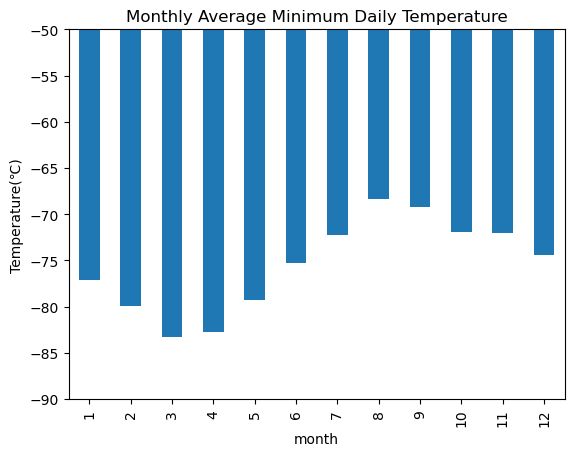

In [30]:
# Monthly average minimum daily temperature bar chart
monthly_temp_df.plot(x='month', y='min_temp(℃)', kind='bar', title="Monthly Average Minimum Daily Temperature") 
plt.ylabel('Temperature(℃)')
plt.ylim(-90, -50)
plt.show()

In [31]:
# Months with the lowest and the highest atmospheric pressure on Mars
# averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

# 9. Answer = Month with the lowest atmospheric pressure is month 6 and highest is month 9

monthly_pres_df = temp_df.groupby('month')['pressure'].mean().sort_values()
monthly_pres_df

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

In [32]:
# Restated without sorting the atmospheric pressure values
monthly_pres_df = temp_df.groupby('month')['pressure'].mean()

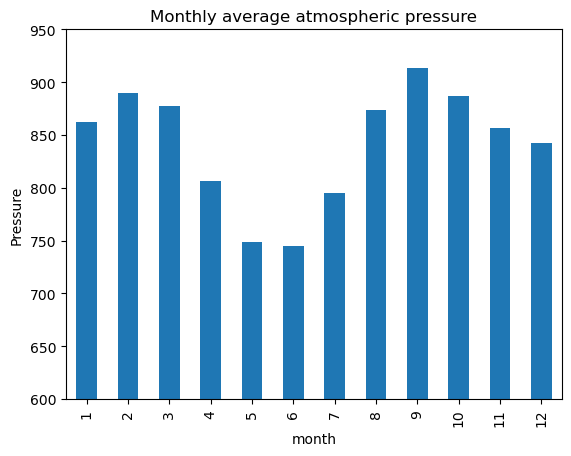

In [33]:
# Monthly average atmospheric pressure bar chart
monthly_pres_df.plot(x='Month', y='Atmospheric Pressure', kind='bar', title="Monthly average atmospheric pressure") 
plt.ylabel('Pressure')
plt.ylim(600, 950)
plt.show()

In [34]:
# 10. About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, 
# How many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.
# terrestrial_date is date on earth
# curiosity id - single transmission from curiosity rover
# sol - Martian days since curiosity landed on Mars


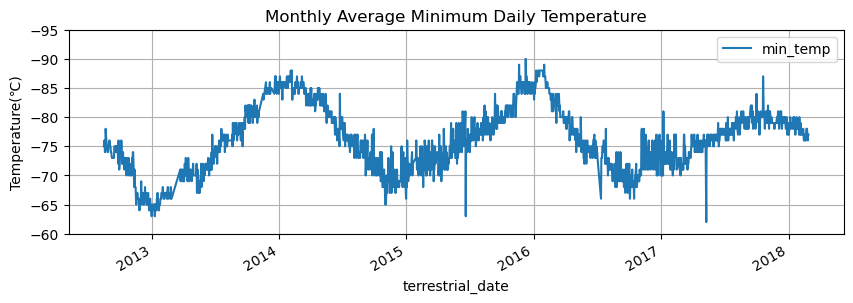

<Figure size 640x480 with 0 Axes>

In [35]:
# No. of terrestrial days in a Martian year calculated by visually estimating daily minimum temperature
temp_df.plot(x='terrestrial_date', y='min_temp', grid="true", figsize=(10,3), title="Monthly Average Minimum Daily Temperature") 
plt.ylabel('Temperature(℃)')
plt.ylim(-60, -95)
plt.show()
plt.tight_layout()

In [36]:
# 10. Answer: Approx. terrestrial days in a Martian year = between 657 days to 712 days in one Martian year
# 2013 to 4/5of 2015 = 365+(4/5*365)= 657days
# last 1/5of 2015(1/5*365) +2016 (365 days) to 3/4 of 2017(3/4*365) = 711.75days

In [37]:
# DataFrame exported into a CSV file
temp_df.to_csv(os.path.join("mars_temperature_data.csv" ))

In [38]:
browser.quit()